<a href="https://colab.research.google.com/github/laelalexander/BEPs/blob/master/Python_Code_for_Interferometry_Analysis_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Interferometry plot saved as interferometry_fit.png. Slope: 0.0173 rad/atm, Error: 0.0004 rad/atm


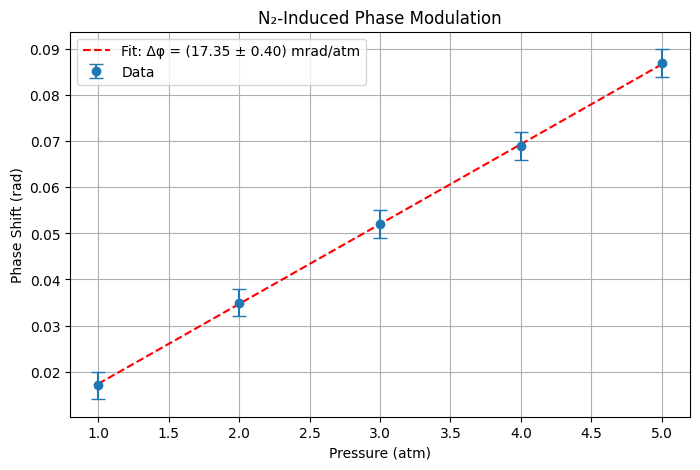

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your data from Table S1 in the research paper
# `pressures` stores the pressure values in atmospheres (atm).
pressures = np.array([1, 2, 3, 4, 5])  # atm
# `phase_shifts` stores the corresponding measured phase shifts in radians (rad).
phase_shifts = np.array([0.017, 0.035, 0.052, 0.069, 0.087])  # rad
# `phase_errors` stores the estimated errors for each phase shift measurement.
phase_errors = np.array([0.003]*5)  # Estimated from fringe tracking

# Define the linear model for the relationship between pressure and phase shift.
# The model assumes that phase shift (Δφ) is directly proportional to pressure (P).
# Δφ = slope * P
def linear_model(P, slope):
    """Δφ = slope * Pressure"""
    return slope * P

# Perform curve fitting to find the best slope for the linear model.
# `curve_fit` from `scipy.optimize` is used.
# It takes the model function, x-data (pressures), y-data (phase_shifts),
# and errors in y-data (`sigma`) as input.
# `absolute_sigma=True` means that `sigma` represents absolute errors.
popt, pcov = curve_fit(linear_model, pressures, phase_shifts,
                       sigma=phase_errors, absolute_sigma=True)
# `popt` contains the optimal parameters found (in this case, just the slope).
slope = popt[0]
# `pcov` is the covariance matrix, from which we can estimate the error in the slope.
slope_err = np.sqrt(pcov[0][0])

# Create the plot for visualization.
# Initialize a figure and an axes object.
plt.figure(figsize=(8, 5))

# Plot the experimental data points with error bars.
# `yerr=phase_errors` adds vertical error bars to each data point.
# `fmt='o'` specifies circular markers for the data points.
# `capsize=5` sets the length of the error bar caps.
# `label="Data"` is for the legend.
plt.errorbar(pressures, phase_shifts, yerr=phase_errors,
             fmt='o', capsize=5, label="Data")

# Plot the linear fit line using the calculated slope.
# `'r--'` specifies a red dashed line.
# The label includes the calculated slope and its error, formatted for readability (mrad/atm).
plt.plot(pressures, linear_model(pressures, slope),
         'r--', label=f"Fit: Δφ = ({slope*1e3:.2f} ± {slope_err*1e3:.2f}) mrad/atm")

# Add labels, title, legend, and grid for a publication-quality plot.
plt.xlabel("Pressure (atm)")  # X-axis label
plt.ylabel("Phase Shift (rad)") # Y-axis label
plt.title("N₂-Induced Phase Modulation") # Plot title
plt.legend()  # Display the legend
plt.grid(True) # Add a grid to the plot

# Save the figure as a PNG file with high resolution (300 DPI).
plt.savefig("interferometry_fit.png", dpi=300)

# Print a confirmation message.
print(f"Interferometry plot saved as interferometry_fit.png. Slope: {slope:.4f} rad/atm, Error: {slope_err:.4f} rad/atm")